<a href="https://colab.research.google.com/github/jiobu1/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Jisha_Obukwelu_DSPT3_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


###Cleaning and analyzing data

In [0]:
#Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel


In [152]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-10-07 04:02:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.3’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2019-10-07 04:02:29 (625 KB/s) - ‘house-votes-84.data.3’ saved [18171/18171]



In [0]:
#Add headers to data
df = pd.read_csv('house-votes-84.data', 
                header = None, 
               names = ['party', 'handicapped-infants', 'water-project-cost-sharing', 
                         'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
                         'el-salvador-aid', 'religious-groups-in-schools', 
                         'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
                         'mx-missile', 'immigration','synfuels-corporation-cutback', 
                         'education-spending', 'superfund-right-to-sue', 
                         'crime', 'duty-free-exports', 
                         'export-administration-act-south-africa'])

In [0]:
#Clean data
df = df.replace({'y':1, 'n':0, '?':np.NaN})

In [155]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


###1. Generate and numerically represent a confidence interval
- Refactor your code so it is elegant, readable, and can be easily run for all issues.


####Calculating the confidence interval

In [0]:
def conf_int (data, confidence=0.95):

  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)


In [0]:
names = ['handicapped-infants', 'water-project-cost-sharing', 
         'adoption-of-the-budget-resolution', 'physician-fee-freeze',
         'el-salvador-aid', 'religious-groups-in-schools', 
         'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
         'mx-missile', 'immigration','synfuels-corporation-cutback', 
         'education-spending', 'superfund-right-to-sue', 
         'crime', 'duty-free-exports', 'export-administration-act-south-africa']

####Calculating Democratic Confidence Intervals

In [158]:
dems_conf = []

for x in names:
  results = conf_int(dems[x].dropna())
  dems_conf.append(results)
  
print(dems_conf)

[(0.6046511627906976, 0.5445926997425515, 0.6647096258388437), (0.502092050209205, 0.43824514095228484, 0.5659389594661252), (0.8884615384615384, 0.8499435153340716, 0.9269795615890052), (0.05405405405405406, 0.02633186149720885, 0.08177624661089927), (0.21568627450980393, 0.1648631139997972, 0.26650943501981067), (0.47674418604651164, 0.41539182663748236, 0.5380965454555409), (0.7722007722007722, 0.7207820216365644, 0.8236195227649801), (0.8288973384030418, 0.7830845214499412, 0.8747101553561424), (0.7580645161290323, 0.7043940111605527, 0.8117350210975118), (0.4714828897338403, 0.41075744059137587, 0.5322083388763047), (0.5058823529411764, 0.4441027014712158, 0.5676620044111371), (0.14457831325301204, 0.10059494022327561, 0.18856168628274847), (0.2896825396825397, 0.23329310265193048, 0.34607197671314893), (0.35019455252918286, 0.2914817910969736, 0.4089073139613921), (0.6374501992031872, 0.5775687099725446, 0.6973316884338299), (0.9351351351351351, 0.8993133658858402, 0.970956904384

In [159]:
dem_conf_int = pd.DataFrame(data = dems_conf, 
                            index = names, 
                            columns = ['mean', 'lower_bound', 'upper_bound' ] )
dem_conf_int.head(16)

,mean,lower_bound,upper_bound
handicapped-infants,0.604651,0.544593,0.664710
water-project-cost-sharing,0.502092,0.438245,0.565939
adoption-of-the-budget-resolution,0.888462,0.849944,0.926980
physician-fee-freeze,0.054054,0.026332,0.081776
el-salvador-aid,0.215686,0.164863,0.266509
religious-groups-in-schools,0.476744,0.415392,0.538097
anti-satellite-test-ban,0.772201,0.720782,0.823620
aid-to-nicaraguan-contras,0.828897,0.783085,0.874710
mx-missile,0.758065,0.704394,0.811735
immigration,0.471483,0.410757,0.532208


####Calculating Republican Confidence Intervals

In [160]:
reps_conf = []

for x in names:
  results = conf_int(reps[x].dropna())
  reps_conf.append(results)
  
print(reps_conf)

[(0.18787878787878787, 0.12765166444807918, 0.24810591130949655), (0.5067567567567568, 0.42526571045979167, 0.5882478030537219), (0.13414634146341464, 0.08143520131697565, 0.18685748160985363), (0.9878787878787879, 0.9710067448304756, 1.0047508309271003), (0.9515151515151515, 0.9183979451371699, 0.9846323578931332), (0.8975903614457831, 0.850987486003394, 0.9441932368881721), (0.24074074074074073, 0.17420089269707362, 0.30728058878440784), (0.15286624203821655, 0.09595477158126557, 0.20977771249516752), (0.11515151515151516, 0.06593485907282265, 0.16436817123020767), (0.5575757575757576, 0.4809959592103161, 0.6341555559411991), (0.1320754716981132, 0.0788755652396695, 0.18527537815655692), (0.8709677419354839, 0.8176017935029393, 0.9243336903680285), (0.8607594936708861, 0.8061858971620528, 0.9153330901797194), (0.9813664596273292, 0.960253517544598, 1.0024794017100602), (0.08974358974358974, 0.044394355010013827, 0.13509282447716567), (0.6575342465753424, 0.5796460416043707, 0.7354224

In [161]:
rep_conf_int = pd.DataFrame(data = reps_conf, 
                            index = names, 
                            columns = ['mean', 'lower_bound', 'upper_bound' ])
rep_conf_int.head(16)

,mean,lower_bound,upper_bound
handicapped-infants,0.187879,0.127652,0.248106
water-project-cost-sharing,0.506757,0.425266,0.588248
adoption-of-the-budget-resolution,0.134146,0.081435,0.186857
physician-fee-freeze,0.987879,0.971007,1.004751
el-salvador-aid,0.951515,0.918398,0.984632
religious-groups-in-schools,0.897590,0.850987,0.944193
anti-satellite-test-ban,0.240741,0.174201,0.307281
aid-to-nicaraguan-contras,0.152866,0.095955,0.209778
mx-missile,0.115152,0.065935,0.164368
immigration,0.557576,0.480996,0.634156


###1. Graphically (with a plot) represent the confidence interval

* Write a summary of your findings, mixing prose and math/code/results. 


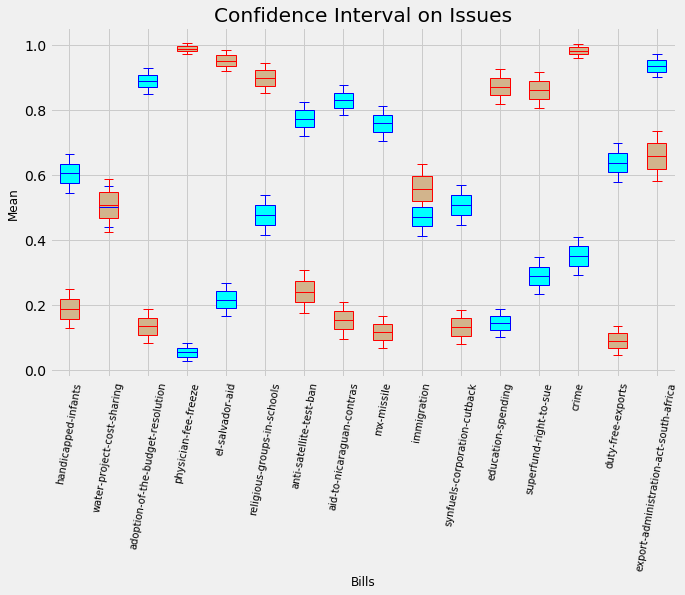

In [162]:
def draw_plot(data, edge_color, fill_color):
    bp = ax.boxplot(data, patch_artist=True)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       

d0 = dem_conf_int
d1 = rep_conf_int

fig, ax = plt.subplots(figsize = (10, 6))
draw_plot(d0, 'blue', 'cyan')
draw_plot(d1, 'red', 'tan')

plt.title('Confidence Interval on Issues')
plt.xlabel('Bills', fontsize = 12)
plt.ylabel('Mean', fontsize = 12)

xtickNames = plt.setp(ax, xticklabels = names)
plt.setp(xtickNames, rotation=80, fontsize=10)

style.use('fivethirtyeight')
plt.grid(True)


###Write a summary of your findings, mixing prose and math/code/results.

From this box plot we can immediately see the issues that are favored by the two parties and which are neutral. The confidence interval for this box and whisker plot is within a 95% confidence interval. 
- The red and tan boxes represent republican votes and the blue and cyan boxes represent the democrats votes. 
- If the box is > 0.5, determines if the issue is favored by the party. If the box is < 0.5, then the issue is more likely to garner a no vote from the party. 
- For example, if you look at the bill for adopting a budget resolution, aprroximately 89% voted yes for this bill versus only 13% of republicans. 
- Neutral issues are ones like the water project cost sharing bill where 51% of republicans and 50% of democrats voted yes.

*Need clarity - 
I do not think that we can really look at these votes together becasue these votes are not things will be repeated (more or less).
I think it would be more informative to see how different parties voted in different categories, i.e. environment, 
gun control, inclusive/exclusive foreign policy, trade policies, etc.

###4. Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
* By hand using Numpy
* In a single line using Scipy

####Loading and choosing data to evaluate

In [164]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [165]:
#Looking for categorical values
df.describe(exclude = 'number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [166]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [167]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [171]:
contingency_table = pd.crosstab(df['salary'], df['race'], margins = True)
contingency_table

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,All
salary,,,,,,
<=50K,275,763,2737,246,20699,24720
>50K,36,276,387,25,7117,7841
All,311,1039,3124,271,27816,32561


In [0]:
contingency_table[['<50 avg', '>50 avg']] = contigency_table

####Expected Value Calculation

In [176]:
row_sums = contingency_table.iloc[0:2, 5].values
col_sums = contingency_table.iloc[2, 0:5].values

print(row_sums)
print(col_sums)

[24720  7841]
[  311  1039  3124   271 27816]


In [177]:
total = contingency_table.loc['All','All']
total

32561

In [178]:
#Manual Expected Value Calculation
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 5)
[[  236.10822763   788.79886981  2371.71094254   205.74060993
  21117.64135008]
 [   74.89177237   250.20113019   752.28905746    65.25939007
   6698.35864992]]


####Chi-Squared Statistic with Numpy

In [179]:
observed = pd.crosstab(df['salary'], df['race']).values
print(observed.shape)
observed

(2, 5)


array([[  275,   763,  2737,   246, 20699],
       [   36,   276,   387,    25,  7117]])

In [180]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

330.9204310085741

####In a single line using Scipy

In [181]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

330.9204310085741 2.305960610160958e-70 4 [[  236.10822763   788.79886981  2371.71094254   205.74060993
  21117.64135008]
 [   74.89177237   250.20113019   752.28905746    65.25939007
   6698.35864992]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)